<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/main/voting_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.datasets import fetch_california_housing
#data_home=None, download_if_missing=True,, n_retries=3, delay=1.0)

In [32]:
x,y= fetch_california_housing( return_X_y=True)
cal= fetch_california_housing()

In [33]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x= scaler.fit_transform(x)

In [66]:
x

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [54]:
cal.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [67]:

df= pd.DataFrame(cal.data, columns= cal.feature_names)
df['target']= cal.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:
#voting regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score

In [34]:
lr= LinearRegression()
svr= SVR()
dt= DecisionTreeRegressor()

In [35]:
estimators=[('lr',lr), ('svr', svr), ('dt',dt)]
for i in estimators:
    scores= cross_val_score(i[1], x, y, cv=2, scoring="r2", n_jobs=-1)
    print(i[0], np.round(scores.mean(), 2))

lr 0.57
svr 0.67
dt 0.31


In [36]:
vr= VotingRegressor(estimators)
scores= cross_val_score(vr, x, y, cv=2, scoring="r2")
print(np.round(scores.mean(), 2))

0.63


In [37]:
for i in range(1,4):
  for j in range(1,4):
    for k in range(1,4):
      vr= VotingRegressor(estimators, weights=[i,j,k])
      scores= cross_val_score(vr, x, y, cv=2, scoring="r2")
      print("for i={}, j={},k={}".format(i,j,k), np.round(scores.mean(), 2))

for i=1, j=1,k=1 0.64
for i=1, j=1,k=2 0.59
for i=1, j=1,k=3 0.56
for i=1, j=2,k=1 0.65
for i=1, j=2,k=2 0.62


KeyboardInterrupt: 

In [21]:
#VOTING CLASSIFIER

In [ ]:
from sklearn.datasets import load_iris
iris= load_iris()
df= pd.DataFrame(iris.data, columns= iris.feature_names)
df['target']= iris.target
df.head()

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

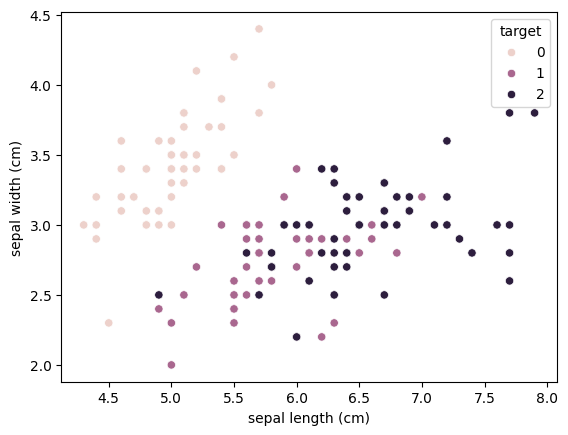

In [10]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=df)

In [13]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [38]:
new_df= df[(df['target']!=0)][['sepal length (cm)', 'sepal width (cm)', 'target']]
new_df.head()


,sepal length (cm),sepal width (cm),target
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [39]:
x=new_df[['sepal length (cm)', 'sepal width (cm)']]
y=new_df['target']

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [41]:
log= LogisticRegression()
knn= KNeighborsClassifier()
rf= RandomForestClassifier()

In [42]:
estimators= [('log', log), ('knn', knn), ('rf', rf)]
for i in estimators:
  scores= cross_val_score(i[1], x, y, cv=2, scoring="accuracy")
  print(i[0], np.round(scores.mean(), 2))

log 0.74
knn 0.67
rf 0.59


In [44]:
from sklearn.ensemble import VotingClassifier
vc= VotingClassifier(estimators,voting= "hard")
scores= cross_val_score(vc, x, y, cv=10, scoring="accuracy")
print(np.round(scores.mean(), 2))

0.67


In [43]:
vc= VotingClassifier(estimators,voting= "soft")
scores= cross_val_score(vc, x, y, cv=10, scoring="accuracy")
print(np.round(scores.mean(), 2))

0.65


In [45]:
#SAME ALGO  SAME DATA DIFFERENT DEGREE

from sklearn.datasets import make_classification
x,y= make_classification(n_samples=1000, n_features=20,
                         n_redundant=5, n_informative=15,
                         random_state=42)

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [53]:
from math import degrees
svc= SVC()


params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 2, 3]
}
grid= GridSearchCV(svc, params, cv=5)
grid.fit(x,y)

print(f"Best parameters found: {grid.best_params_}")

# Best estimator
best_svc = grid.best_estimator_
print(f"Best estimator: {best_svc}")

# Optionally, you can also print the best score achieved during the grid search
print(f"Best score: {grid.best_score_:.4f}")



Best parameters found: {'degree': 1, 'kernel': 'rbf'}
Best estimator: SVC(degree=1)
Best score: 0.9410


In [55]:
svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)
svm6 = SVC(probability=True, kernel='rbf',  degree=1)
svm7 = SVC(probability=True, kernel='rbf',  degree=2)
svm8 = SVC(probability=True, kernel='rbf',  degree=3)

estimators= [('svm1', svm1), ('svm2', svm2), ('svm3', svm3),
            ('svm4', svm4), ('svm5', svm5),('svm6',svm6),('svm7',svm7)]
for i in estimators:
  scores= cross_val_score(i[1], x, y, cv=2, scoring="accuracy")
  print(i[0], np.round(scores.mean(), 2))

svm1 0.81
svm2 0.89
svm3 0.89
svm4 0.81
svm5 0.83
svm6 0.93
svm7 0.93


In [56]:
vc1= VotingClassifier(estimators,voting= "soft")
scores= cross_val_score(vc1, x, y, cv=10, scoring="accuracy")
print(np.round(scores.mean(), 2))

0.94
